<a href="https://colab.research.google.com/github/PatriciaLucas/CNN/blob/master/Previsao_ETo_EnsembleCNN2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Previsão de evapotranspiração de referência com ensemble CNN2

  


In [1]:
!pip install keras-tcn==2.8.3
!git clone https://github.com/PatriciaLucas/CNN
from CNN import Ensemble as es
import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

Cloning into 'CNN'...
remote: Enumerating objects: 68, done.
remote: Counting objects: 100% (68/68), done.
remote: Compressing objects: 100% (66/66), done.
remote: Total 68 (delta 35), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (68/68), done.


Using TensorFlow backend.


##Base de dados

In [0]:
def get_search_dataset():
    df1 = pd.read_csv('https://raw.githubusercontent.com/PatriciaLucas/Evapotranspiracao/master/ETo_setelagoas.csv', sep=',')
    series = df1.iloc[:,1]
    train = series[:6939]
    test = series[8035:] #ano de teste: 2015
    return train, test

##Executa ensemble CNN2 com 6 modelos


In [0]:
train, test = get_search_dataset()
rmse, yhat, kde_list = es.executa(train, test, 1, 6)

In [4]:
for i in range(10):
  print("RMSE do horizonte de previsão ",i+1, " : ", rmse[i])

RMSE do horizonte de previsão  1  :  0.7979374002066958
RMSE do horizonte de previsão  2  :  0.8660727371029809
RMSE do horizonte de previsão  3  :  0.9186267856270726
RMSE do horizonte de previsão  4  :  0.9493122694914583
RMSE do horizonte de previsão  5  :  0.9780780840089472
RMSE do horizonte de previsão  6  :  0.9837383421546134
RMSE do horizonte de previsão  7  :  0.9915740461851928
RMSE do horizonte de previsão  8  :  1.0106266531510433
RMSE do horizonte de previsão  9  :  1.0248093137220842
RMSE do horizonte de previsão  10  :  1.024498133577777


##Intervalo de confiança da previsão do horizonte 1

Text(0, 0.5, 'ETo')

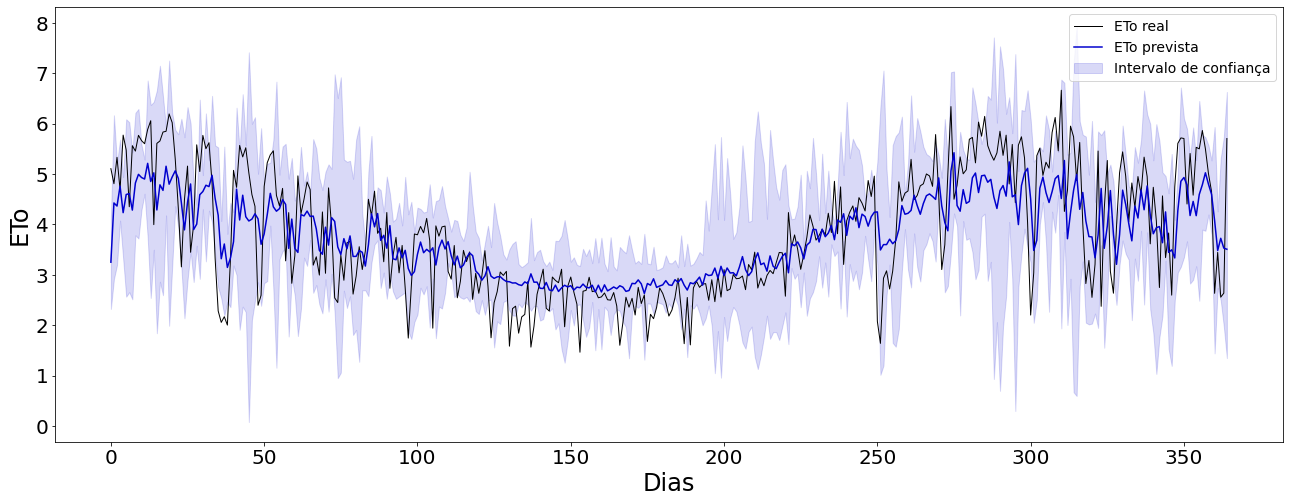

In [5]:
y_hat_CNN = np.zeros((365,100))
y_mean = np.zeros((365))
y_max = np.zeros((365))
y_min = np.zeros((365))
x = np.zeros((365))
for i in range(365):
    y = kde_list[0][i].sample(100)
    y_mean[i] = y.mean()
    y_max[i] = y.max()
    y_min[i] = y.min()
    y_hat_CNN[i,:] = y.reshape(1,-1)
    x[i] = i

fig, ax = plt.subplots(figsize=[22,8])
plt.grid(False)
plt.plot(x,test,'-', color = 'black', ms=4, lw=1, alpha=1, label='ETo real')
plt.plot(x,y_mean,'-', color = 'mediumblue', ms=4, lw=1, alpha=1, label='ETo prevista',linewidth=1.5)
ax.fill_between(x, y_min, y_max, color='mediumblue', alpha=0.15, label='Intervalo de confiança')
plt.tick_params(labelsize=20)
plt.legend(fontsize=14)
plt.xlabel("Dias", fontsize=24)
plt.ylabel("ETo", fontsize=24)

##Análise dos resíduos para o horizonte de previsão 1

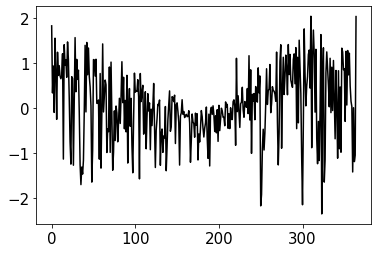

In [6]:
residuals = test - yhat[:,0]
plt.plot(x,residuals,'-', color = 'black', ms=4, lw=1, alpha=1, linewidth=1.5)
plt.tick_params(labelsize=15)

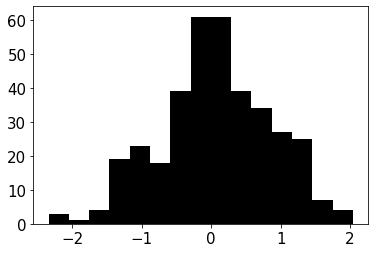

In [7]:
plt.hist(residuals, bins='auto', color='black')
plt.tick_params(labelsize=15)

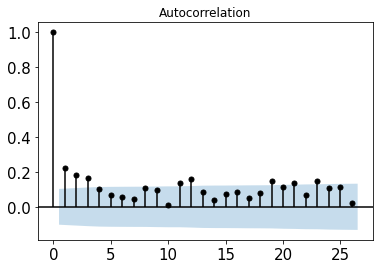

In [8]:
plot_acf(residuals, plt.gca(), color='black', )
plt.tick_params(labelsize=15)

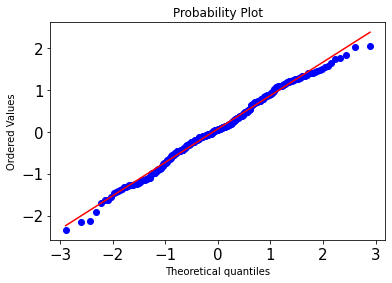

In [9]:
stats.probplot(np.reshape(residuals, (-1)), dist=stats.norm, plot=plt)
plt.tick_params(labelsize=15)
plt.show()